Import the necessary libraries:

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
import itertools
import seaborn as sns
from imblearn.over_sampling import SMOTE
import xgboost as xgb

Read data from the clean master csv:

In [187]:
#df = pd.read_csv('Master_Clean.csv', index_col=0)
df = pd.read_csv('Master_Data_dropfirst_for_categorical.csv', index_col=0)
df.head()

,SEQN,Age,Heart_Rate,Irregular_Pulse,Systolic_BP_Avg,Diastolic_BP_Avg,Weight_kg,Height_cm,BMI,Waist_cm,...,Family_Income_5.0,Family_Income_6.0,Family_Income_7.0,Family_Income_8.0,Family_Income_9.0,Family_Income_10.0,Family_Income_12.0,Family_Income_13.0,Family_Income_14.0,Family_Income_15.0
0,83732.0,62.0,76.0,0.0,122.666667,65.333333,94.8,184.5,27.8,101.1,...,0,0,0,0,0,1,0,0,0,0
1,83733.0,53.0,72.0,0.0,140.000000,86.000000,90.4,171.4,30.8,107.9,...,0,0,0,0,0,0,0,0,0,0
2,83735.0,56.0,78.0,0.0,134.000000,70.000000,109.8,160.9,42.4,110.1,...,0,0,0,0,0,1,0,0,0,0
3,83736.0,42.0,76.0,0.0,104.000000,60.000000,55.2,164.9,20.3,80.4,...,0,0,1,0,0,0,0,0,0,0
4,83741.0,22.0,66.0,0.0,111.333333,72.666667,76.6,165.4,28.0,86.6,...,0,0,1,0,0,0,0,0,0,0


In [188]:
df.shape

(4423, 58)

Separate features and target into two different dataframes:

In [189]:
df_target = df['Target']
df_features = df.drop(columns=['SEQN', 'Target'])

In [190]:
df_target.value_counts()

0.0    4343
1.0      80
Name: Target, dtype: int64

0: No CHD; 1: CHD -- there is a class imbalance. Use SMOTE to upsample underrepresented class (only for training).

In [191]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=123)

In [192]:
sm = SMOTE(random_state=123)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [193]:
print(sum(y_train==0))
print(sum(y_train==1))

3473
3473


In [194]:
print(sum(y_test==0))
print(sum(y_test==1))

870
15


## Logistic Regression Models

**Initial Model:**

In [195]:
from sklearn.linear_model import LogisticRegression

AUC: 0.8826053639846744


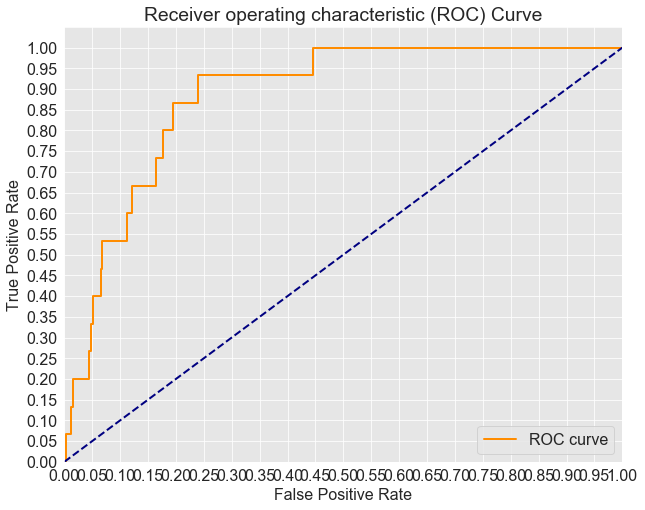

In [196]:
#Initial Model
logreg = LogisticRegression(fit_intercept = False)

#Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [197]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 14)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=10)
    plt.yticks(tick_marks, classes, size=10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size=12)
    plt.xlabel('Predicted label', size=12)

Confusion matrix, without normalization
[[757 113]
 [  5  10]]


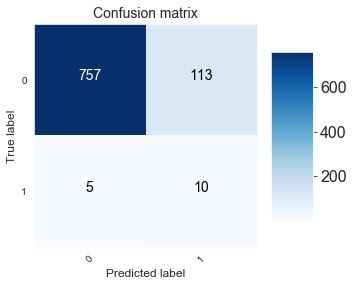

In [198]:
y_hat_test = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [199]:
print('Accuracy Score:  ' + str(accuracy_score(y_test, y_hat_test)))
print('F1 Score:        ' + str(f1_score(y_test, y_hat_test)))
print('Precision Score: ' + str(precision_score(y_test, y_hat_test)))
print('Recall Score:    ' + str(recall_score(y_test, y_hat_test)))
report = classification_report(y_test, y_hat_test)
print ('')
print (report)

Accuracy Score:  0.8666666666666667
F1 Score:        0.14492753623188406
Precision Score: 0.08130081300813008
Recall Score:    0.6666666666666666

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       870
         1.0       0.08      0.67      0.14        15

   micro avg       0.87      0.87      0.87       885
   macro avg       0.54      0.77      0.54       885
weighted avg       0.98      0.87      0.91       885



**Tuning Logistic Regression Model:**

LogisticRegression(C=0.005, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for 0.005: 0.8755555555555556
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AUC for 0.01: 0.8815325670498084
LogisticRegression(C=0.015, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for 0.015: 0.8824521072796935
LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=False,
          intercept_

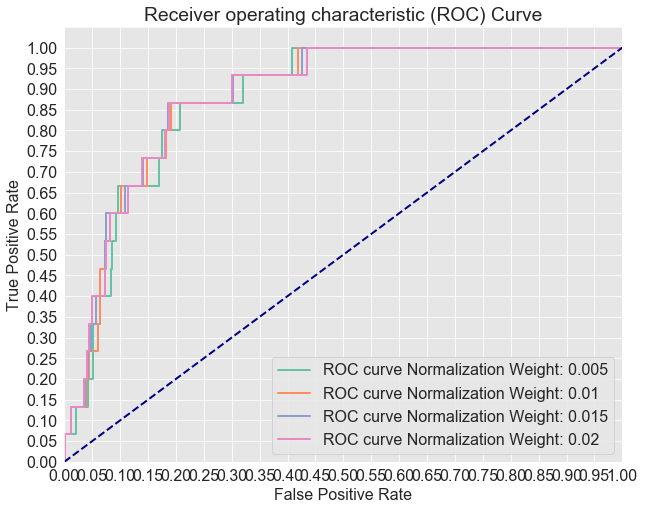

In [200]:
C_param_range = [0.005,0.01,0.015,0.02]
names = [0.005,0.01,0.015,0.02]
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c)
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[727 143]
 [  4  11]]


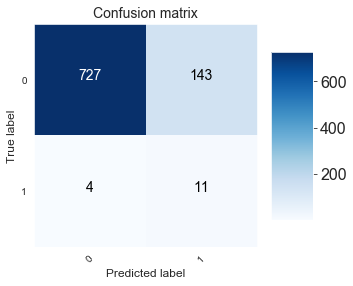

In [201]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [202]:
print('Accuracy Score:  ' + str(accuracy_score(y_test, y_hat_test)))
print('F1 Score:        ' + str(f1_score(y_test, y_hat_test)))
print('Precision Score: ' + str(precision_score(y_test, y_hat_test)))
print('Recall Score:    ' + str(recall_score(y_test, y_hat_test)))
report = classification_report(y_test, y_hat_test)
print ('')
print (report)

Accuracy Score:  0.8338983050847457
F1 Score:        0.1301775147928994
Precision Score: 0.07142857142857142
Recall Score:    0.7333333333333333

              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91       870
         1.0       0.07      0.73      0.13        15

   micro avg       0.83      0.83      0.83       885
   macro avg       0.53      0.78      0.52       885
weighted avg       0.98      0.83      0.89       885



In [204]:
print(logreg.coef_)

[[ 9.01292596e-02 -4.02143507e-02  2.65718071e-01 -6.31867151e-03
  -3.92386068e-03 -2.22775360e-03 -2.40258800e-02 -1.57199411e-01
   6.67242465e-02 -1.37761834e-01 -8.87748703e-02  6.56317626e-01
   1.11856822e+00  5.49072619e-05 -1.71306615e-03 -2.59801717e-04
   4.01410033e-03  4.11324317e-01 -5.62952847e-03 -3.35857277e-02
  -1.96538630e-02  1.51538251e-01 -3.38346182e-02  3.13515918e-01
   8.14403096e-01  4.06806447e-01  3.74124882e-02 -1.77361136e-01
   1.88003475e-01  8.57008775e-01  1.38380773e-01 -8.72798372e-02
  -4.34778008e-02  1.21827767e-02 -8.85207547e-02 -4.29148686e-01
  -7.26605603e-01  1.69310346e-01  2.00958431e-01 -2.92312226e-01
  -4.28002586e-02  5.36672267e-01 -3.56755485e-01 -3.15404677e-01
   3.65120581e-01  3.30185277e-01  4.40707775e-01 -1.67923903e-02
  -4.82346846e-01 -1.75698887e-01  4.73351827e-01 -3.01318899e-01
  -2.32715860e-01  7.82794993e-01  2.55436459e-03 -5.00932214e-01]]


In [212]:
print(logreg.coef_.transpose)

<built-in method transpose of numpy.ndarray object at 0x1a1f7713a0>


In [213]:
features = list(df_features.columns.values)
feature_importances = pd.DataFrame(np.transpose(logreg.coef_),
                                   index = features,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances

,Importance
Ever_told_high_cholesterol,1.118568
Smoked_at_least_100_cigarettes_in_life,0.857009
Doctor_told_you_reduce_salt,0.814403
Family_Income_13.0,0.782795
Ever_told_high_blood_pressure,0.656318
Race_7.0,0.536672
Family_Income_9.0,0.473352
Family_Income_5.0,0.440708
Doctor_told_you_have_diabetes,0.411324
Doctor_told_you_reduce_fat_calories,0.406806


## KNN Classifier Models:

In [136]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_features)

In [137]:
scaled_df_features = pd.DataFrame(scaled_df, columns = df_features.columns)
scaled_df_features.head()

,Age,Heart_Rate,Irregular_Pulse,Systolic_BP_Avg,Diastolic_BP_Avg,Weight_kg,Height_cm,BMI,Waist_cm,Avg_Num_Alcohol_Drink_a_Day,...,Family_Income_5.0,Family_Income_6.0,Family_Income_7.0,Family_Income_8.0,Family_Income_9.0,Family_Income_10.0,Family_Income_12.0,Family_Income_13.0,Family_Income_14.0,Family_Income_15.0
0,1.480049,0.235253,-0.122127,0.027259,-0.547959,0.553287,1.818065,-0.251833,0.108434,-0.787793,...,-0.251946,-0.343993,-0.314455,-0.305251,-0.260464,4.360456,-0.13998,-0.106929,-0.323063,-0.549922
1,0.800099,-0.117647,-0.122127,1.101718,1.306724,0.353847,0.474844,0.164677,0.520973,1.763392,...,-0.251946,-0.343993,-0.314455,-0.305251,-0.260464,-0.229334,-0.13998,-0.106929,-0.323063,-0.549922
2,1.026749,0.411703,-0.122127,0.729790,-0.129159,1.233195,-0.601784,1.775182,0.654442,-0.787793,...,-0.251946,-0.343993,-0.314455,-0.305251,-0.260464,4.360456,-0.13998,-0.106929,-0.323063,-0.549922
3,-0.030951,0.235253,-0.122127,-1.129851,-1.026586,-1.241671,-0.191640,-1.293108,-1.147385,-0.787793,...,-0.251946,-0.343993,3.180105,-0.305251,-0.260464,-0.229334,-0.13998,-0.106929,-0.323063,-0.549922
4,-1.541952,-0.646996,-0.122127,-0.675272,0.110154,-0.271668,-0.140372,-0.224066,-0.771246,2.783867,...,-0.251946,-0.343993,3.180105,-0.305251,-0.260464,-0.229334,-0.13998,-0.106929,-0.323063,-0.549922


In [138]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_df_features, df_target, test_size=0.2, random_state=123)


In [139]:
sm = SMOTE()
X_train_scaled, y_train_scaled = sm.fit_sample(X_train_scaled, y_train_scaled)

In [140]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train_scaled)
test_preds = knn_model.predict(X_test_scaled)

In [141]:
print('Accuracy Score:  ' + str(accuracy_score(y_test, test_preds)))
print('F1 Score:        ' + str(f1_score(y_test, test_preds)))
print('Precision Score: ' + str(precision_score(y_test, test_preds)))
print('Recall Score:    ' + str(recall_score(y_test, test_preds)))
report = classification_report(y_test, test_preds)
print ('')
print (report)

Accuracy Score:  0.8598870056497175
F1 Score:        0.11428571428571431
Precision Score: 0.064
Recall Score:    0.5333333333333333

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92       870
         1.0       0.06      0.53      0.11        15

   micro avg       0.86      0.86      0.86       885
   macro avg       0.53      0.70      0.52       885
weighted avg       0.98      0.86      0.91       885



Confusion matrix, without normalization
[[753 117]
 [  7   8]]


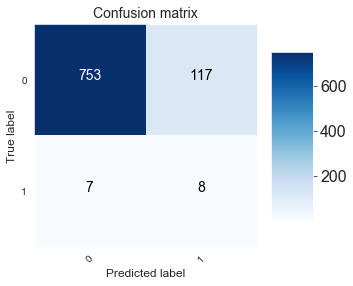

In [142]:
cnf_matrix = confusion_matrix(y_test, test_preds)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [143]:
train_knn_predictions = knn_model.predict(X_train)
train_knn_probs = knn_model.predict_proba(X_train)[:,1]

knn_predictions = knn_model.predict(X_test)
knn_probs = knn_model.predict_proba(X_test)[:,1]

Recall Baseline: 0.0 Test: 0.0 Train: 0.0
Precision Baseline: 0.0 Test: 0.0 Train: 0.0
Roc Baseline: 0.5 Test: 0.5 Train: 0.5


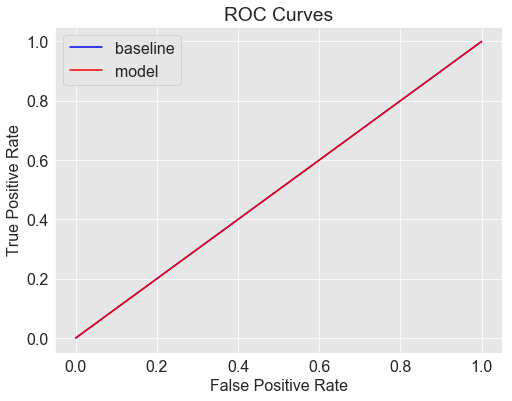

In [144]:
evaluate_model(knn_predictions, knn_probs, train_knn_predictions, train_knn_probs)

**Search to find the best K for KNN model**

In [145]:
def find_best_k(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train_scaled)
        preds = knn.predict(X_test_scaled)
        f1 = recall_score(y_test_scaled, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1

    print('Best K: {}'.format(best_k))
    print('Best Score: {}'.format(best_score))

In [146]:
find_best_k(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

Best K: 5
Best Score: 0.5333333333333333


In [147]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train_scaled)
test_preds = knn_model.predict(X_test_scaled)

In [148]:
print('Accuracy Score:  ' + str(accuracy_score(y_test, test_preds)))
print('F1 Score:        ' + str(f1_score(y_test, test_preds)))
print('Precision Score: ' + str(precision_score(y_test, test_preds)))
print('Recall Score:    ' + str(recall_score(y_test, test_preds)))
report = classification_report(y_test, test_preds)
print ('')
print (report)

Accuracy Score:  0.8598870056497175
F1 Score:        0.11428571428571431
Precision Score: 0.064
Recall Score:    0.5333333333333333

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92       870
         1.0       0.06      0.53      0.11        15

   micro avg       0.86      0.86      0.86       885
   macro avg       0.53      0.70      0.52       885
weighted avg       0.98      0.86      0.91       885



Confusion matrix, without normalization
[[753 117]
 [  7   8]]


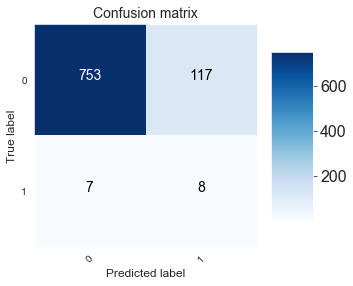

In [149]:
cnf_matrix = confusion_matrix(y_test_scaled, test_preds)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [150]:
train_knn_predictions = knn_model.predict(X_train)
train_knn_probs = knn_model.predict_proba(X_train)[:,1]

knn_predictions = knn_model.predict(X_test)
knn_probs = knn_model.predict_proba(X_test)[:,1]

Recall Baseline: 0.0 Test: 0.0 Train: 0.0
Precision Baseline: 0.0 Test: 0.0 Train: 0.0
Roc Baseline: 0.5 Test: 0.5 Train: 0.5


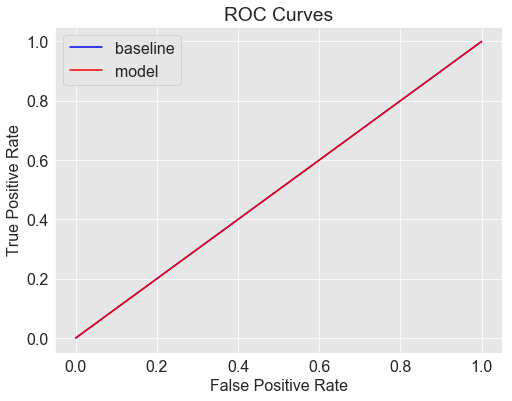

In [151]:
evaluate_model(knn_predictions, knn_probs, train_knn_predictions, train_knn_probs)

## Random Forest Classifier Models:

**Parameter tuning for best RF model**

In [86]:
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 25).astype(int)),
    'max_features': ['auto', 'sqrt', 'log2', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 60, 500).astype(int)),
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf':[1,10,20,30,40,50,100]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 123)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, scoring = 'recall', cv = 3, n_iter=10, random_state=123)

# Fit 
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, ...: [True, False], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 10, 20, 30, 40, 50, 100]},
          pre_dispatch='2*n_

In [87]:
rs.best_params_

{'n_estimators': 168,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 27,
 'max_features': 0.6,
 'max_depth': 22,
 'criterion': 'entropy',
 'bootstrap': True}

In [88]:
best_model = rs.best_estimator_

In [89]:
train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:,1]

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:,1]

In [90]:
y_pred = best_model.predict(X_test)

In [91]:
print('Accuracy Score:  ' + str(accuracy_score(y_test, y_pred)))
print('F1 Score:        ' + str(f1_score(y_test, y_pred,)))
print('Precision Score: ' + str(precision_score(y_test, y_pred,)))
print('Recall Score:    ' + str(recall_score(y_test, y_pred)) )
report = classification_report(y_test, y_pred, target_names=['No CHD', 'CHD'])
print ('')
print (report)

Accuracy Score:  0.9694915254237289
F1 Score:        0.1818181818181818
Precision Score: 0.16666666666666666
Recall Score:    0.2

              precision    recall  f1-score   support

      No CHD       0.99      0.98      0.98       870
         CHD       0.17      0.20      0.18        15

   micro avg       0.97      0.97      0.97       885
   macro avg       0.58      0.59      0.58       885
weighted avg       0.97      0.97      0.97       885



In [92]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [0 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [0 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [0 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 0.0 Test: 0.2 Train: 0.99
Precision Baseline: 0.0 Test: 0.17 Train: 0.99
Roc Baseline: 0.5 Test: 0.83 Train: 1.0


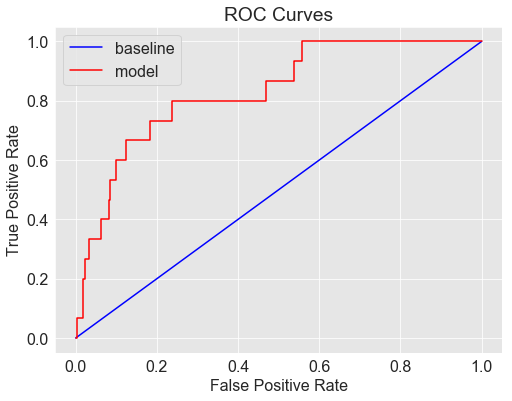

In [93]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Confusion matrix, without normalization
[[855  15]
 [ 12   3]]


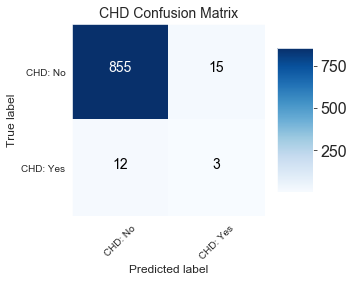

In [94]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['CHD: No', 'CHD: Yes'],
                      title = 'CHD Confusion Matrix')

**Feature Importance**

In [95]:
# features = list(df_features.columns.values)
# feature_importances = pd.DataFrame(best_model.feature_importances_,
#                                    index = features,
#                                    columns=['Importance']).sort_values('Importance', ascending=False)
# feature_importances

## Running PCA for continuous variables

In [152]:
df.shape

(4423, 58)

In [153]:
features = ['Systolic_BP_Avg', 'Diastolic_BP_Avg', 'Weight_kg', 'Height_cm', 'BMI', 'Waist_cm', 'Age', 'Heart_Rate', 
            'Avg_Num_Alcohol_Drink_a_Day', 'Money_spent_at_supermarket_grocery_store', 'Money_spent_on_food_at_other_stores', 
            'Money_spent_eating_out', 'Money_spent_carryout_delivered_foods', 'Meals_not_home_prepared', 'Past_30day_ready_to_eat_foods', 
            'Past_30day_frozen_meals_pizza']

In [154]:
X = df.loc[:,features].values

In [155]:
y = df.loc[:,['Target']].values

In [156]:
X = StandardScaler().fit_transform(X)

In [157]:
pd.DataFrame(data = X, columns = features).head()

,Systolic_BP_Avg,Diastolic_BP_Avg,Weight_kg,Height_cm,BMI,Waist_cm,Age,Heart_Rate,Avg_Num_Alcohol_Drink_a_Day,Money_spent_at_supermarket_grocery_store,Money_spent_on_food_at_other_stores,Money_spent_eating_out,Money_spent_carryout_delivered_foods,Meals_not_home_prepared,Past_30day_ready_to_eat_foods,Past_30day_frozen_meals_pizza
0,0.027259,-0.547959,0.553287,1.818065,-0.251833,0.108434,1.480049,0.235253,-0.787793,-0.320183,-0.705686,-0.129623,-0.459228,-0.627933,-0.070270,-0.320116
1,1.101718,1.306724,0.353847,0.474844,0.164677,0.520973,0.800099,-0.117647,1.763392,-0.519192,-0.446837,-0.463573,-0.459228,-0.885931,-0.327239,-0.320116
2,0.729790,-0.129159,1.233195,-0.601784,1.775182,0.654442,1.026749,0.411703,-0.787793,-0.320183,0.588557,-0.424284,-0.459228,-0.111937,1.086091,1.682909
3,-1.129851,-1.026586,-1.241671,-0.191640,-1.293108,-1.147385,-0.030951,0.235253,-0.787793,-0.320183,-0.705686,0.165039,-0.459228,-0.111937,0.058215,-0.186581
4,-0.675272,0.110154,-0.271668,-0.140372,-0.224066,-0.771246,-1.541952,-0.646996,2.783867,-0.917209,1.882800,-0.227843,-0.459228,-0.111937,-0.327239,-0.320116


In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X)

In [159]:
df_pca = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
result_df = pd.concat([df_pca, df['Target']], axis = 1)
result_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Target
0,0.612730,-0.781624,-0.111069,-0.632930,-0.485002,-1.003768,-0.748189,0.227482,-0.408276,-1.275023,-0.123384,1.470680,0.0
1,1.399844,-1.416029,0.696668,-1.401632,-0.974445,0.363959,0.598427,-0.323756,0.507826,0.698484,-0.118124,0.477732,0.0
2,2.162232,-0.423096,-0.215417,0.449095,2.296469,-0.583378,0.416804,-0.654436,-0.244860,0.086276,0.594540,-0.005795,0.0
3,-2.450066,-0.101141,-0.758423,-0.242725,0.337816,-0.110754,-0.887301,0.468515,0.031641,-0.391522,0.131611,0.620349,0.0
4,-0.919495,1.044762,-0.525561,-0.983763,-1.571185,0.768448,1.250626,-2.148352,1.037477,1.128764,0.787055,-0.628830,0.0


In [160]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.19238635 0.10524175 0.09042434 0.08110664 0.06779649 0.06527486
 0.0614748  0.05869619 0.05446696 0.05163823 0.04911169 0.04675508]

 Total Variance Explained: 92.44


In [161]:
df_w_pca_components = pd.concat([df_pca, df], axis = 1)

In [162]:
df_w_pca_components.shape

(4423, 70)

In [163]:
df_w_pca_components.drop(columns=['Systolic_BP_Avg', 'Diastolic_BP_Avg', 'Weight_kg', 'Age', 'Heart_Rate', 'Avg_Num_Alcohol_Drink_a_Day', 
                                  'Height_cm', 'BMI', 'Waist_cm', 'Money_spent_at_supermarket_grocery_store', 
                                  'Money_spent_on_food_at_other_stores', 'Money_spent_eating_out', 'Money_spent_carryout_delivered_foods', 
                                  'Meals_not_home_prepared', 'Past_30day_ready_to_eat_foods', 'Past_30day_frozen_meals_pizza', ], inplace=True)

In [164]:
df_w_pca_components.shape

(4423, 54)

In [165]:
df_PCA_target = df_w_pca_components['Target']
df_PCA_features = df_w_pca_components.drop(columns=['SEQN', 'Target'])

In [166]:
df_target.value_counts()

0.0    4343
1.0      80
Name: Target, dtype: int64

In [167]:
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(df_PCA_features, df_PCA_target, test_size=0.2, random_state=123)


In [168]:
sm = SMOTE(random_state=123)
X_PCA_train, y_PCA_train = sm.fit_sample(X_PCA_train, y_PCA_train)

In [169]:
print(sum(y_PCA_train==0))
print(sum(y_PCA_train==1))

3473
3473


In [170]:
print(sum(y_PCA_test==0))
print(sum(y_PCA_test==1))

870
15


In [106]:
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 25).astype(int)),
    'max_features': ['auto', 'sqrt', 'log2', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 60, 500).astype(int)),
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf':[1,10,20,30,40,50,100]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 123)

# Create the random search model
rs_pca = RandomizedSearchCV(estimator, param_grid, scoring = 'recall', cv = 3, n_iter=10, random_state=123)

# Fit 
rs_pca.fit(X_PCA_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, ...: [True, False], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 10, 20, 30, 40, 50, 100]},
          pre_dispatch='2*n_

In [107]:
rs_pca.best_params_

{'n_estimators': 141,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 12,
 'max_features': 'sqrt',
 'max_depth': 19,
 'criterion': 'entropy',
 'bootstrap': True}

In [108]:
best_model_pca = rs_pca.best_estimator_

In [109]:
train_rf_predictions_pca = best_model_pca.predict(X_PCA_train)
train_rf_probs_pca = best_model_pca.predict_proba(X_PCA_train)[:,1]

rf_predictions_pca = best_model_pca.predict(X_PCA_test)
rf_probs_pca = best_model_pca.predict_proba(X_PCA_test)[:,1]

In [110]:
y_pred = best_model_pca.predict(X_PCA_test)

In [111]:
print('Accuracy Score:  ' + str(accuracy_score(y_PCA_test, y_pred)))
print('F1 Score:        ' + str(f1_score(y_PCA_test, y_pred)))
print('Precision Score: ' + str(precision_score(y_PCA_test, y_pred)))
print('Recall Score:    ' + str(recall_score(y_PCA_test, y_pred)))
report = classification_report(y_PCA_test, y_pred, target_names=['No CHD', 'CHD'])
print ('')
print (report)

Accuracy Score:  0.911864406779661
F1 Score:        0.18750000000000003
Precision Score: 0.1111111111111111
Recall Score:    0.6

              precision    recall  f1-score   support

      No CHD       0.99      0.92      0.95       870
         CHD       0.11      0.60      0.19        15

   micro avg       0.91      0.91      0.91       885
   macro avg       0.55      0.76      0.57       885
weighted avg       0.98      0.91      0.94       885



Confusion matrix, without normalization
[[855  15]
 [ 12   3]]


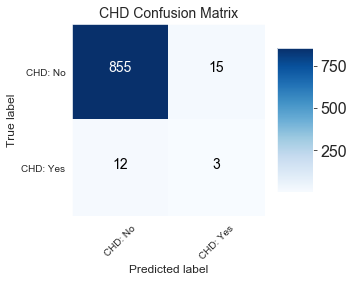

In [113]:
cm = confusion_matrix(y_PCA_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['CHD: No', 'CHD: Yes'],
                      title = 'CHD Confusion Matrix')

## Logistic Regression w/ PCA:

AUC: 0.8491187739463602


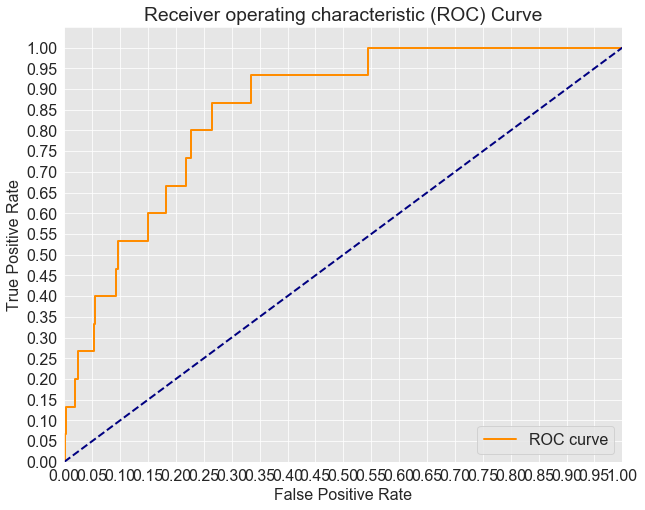

In [114]:
#Initial Model
logreg = LogisticRegression(fit_intercept = False)

#Probability scores for test set
y_score = logreg.fit(X_PCA_train, y_PCA_train).decision_function(X_PCA_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_PCA_test, y_score)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[742 128]
 [  7   8]]


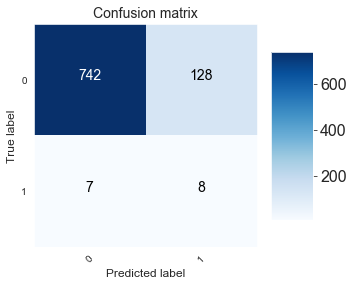

In [115]:
y_hat_test = logreg.predict(X_PCA_test)
cnf_matrix = confusion_matrix(y_PCA_test, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

**tuning logistic regression model**

LogisticRegression(C=0.005, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for 0.005: 0.8550191570881225
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AUC for 0.01: 0.8549425287356321
LogisticRegression(C=0.015, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for 0.015: 0.8563218390804598
LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=False,
          intercept_

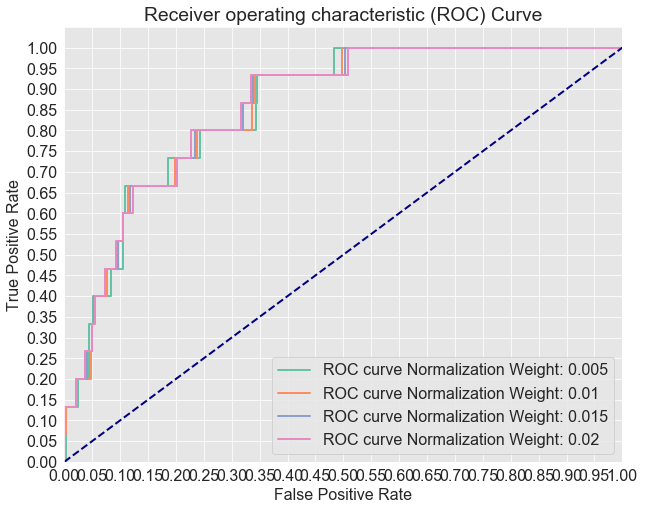

In [116]:
C_param_range = [0.005,0.01,0.015,0.02]
names = [0.005,0.01,0.015,0.02]
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c)
    model_log = logreg.fit(X_PCA_train, y_PCA_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_PCA_test)

    y_score = logreg.fit(X_PCA_train, y_PCA_train).decision_function(X_PCA_test)

    fpr, tpr, thresholds = roc_curve(y_PCA_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[720 150]
 [  5  10]]


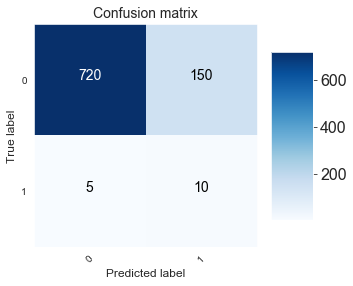

In [118]:
cnf_matrix = confusion_matrix(y_PCA_test, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [119]:
print('Accuracy Score:  ' + str(accuracy_score(y_PCA_test, y_hat_test)))
print('F1 Score:        ' + str(f1_score(y_PCA_test, y_hat_test)))
print('Precision Score: ' + str(precision_score(y_PCA_test, y_hat_test)))
print('Recall Score:    ' + str(recall_score(y_PCA_test, y_hat_test)))
report = classification_report(y_PCA_test, y_hat_test)
print ('')
print (report)

Accuracy Score:  0.8248587570621468
F1 Score:        0.11428571428571428
Precision Score: 0.0625
Recall Score:    0.6666666666666666

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       870
         1.0       0.06      0.67      0.11        15

   micro avg       0.82      0.82      0.82       885
   macro avg       0.53      0.75      0.51       885
weighted avg       0.98      0.82      0.89       885



## KNN w/ PCA

In [171]:
scaler = StandardScaler()
scaled_df_PCA = scaler.fit_transform(df_PCA_features)

In [172]:
scaled_df_PCA_features = pd.DataFrame(scaled_df_PCA, columns = df_PCA_features.columns)
scaled_df_PCA_features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Family_Income_5.0,Family_Income_6.0,Family_Income_7.0,Family_Income_8.0,Family_Income_9.0,Family_Income_10.0,Family_Income_12.0,Family_Income_13.0,Family_Income_14.0,Family_Income_15.0
0,0.349238,-0.602343,-0.092340,-0.555606,-0.465672,-0.982201,-0.754402,0.234737,-0.437348,-1.402724,...,-0.251946,-0.343993,-0.314455,-0.305251,-0.260464,4.360456,-0.13998,-0.106929,-0.323063,-0.549922
1,0.797871,-1.091234,0.579193,-1.230398,-0.935607,0.356139,0.603396,-0.334082,0.543986,0.768442,...,-0.251946,-0.343993,-0.314455,-0.305251,-0.260464,-0.229334,-0.13998,-0.106929,-0.323063,-0.549922
2,1.232410,-0.326050,-0.179093,0.394231,2.204941,-0.570844,0.420265,-0.675309,-0.262296,0.094917,...,-0.251946,-0.343993,-0.314455,-0.305251,-0.260464,4.360456,-0.13998,-0.106929,-0.323063,-0.549922
3,-1.396467,-0.077943,-0.630534,-0.213072,0.324352,-0.108374,-0.894669,0.483458,0.033894,-0.430736,...,-0.251946,-0.343993,3.180105,-0.305251,-0.260464,-0.229334,-0.13998,-0.106929,-0.323063,-0.549922
4,-0.524086,0.805125,-0.436939,-0.863580,-1.508564,0.751937,1.261011,-2.216872,1.111352,1.241817,...,-0.251946,-0.343993,3.180105,-0.305251,-0.260464,-0.229334,-0.13998,-0.106929,-0.323063,-0.549922


In [173]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_df_PCA_features, df_target, test_size=0.2, random_state=123)


In [174]:
sm = SMOTE()
X_train_scaled, y_train_scaled = sm.fit_sample(X_train_scaled, y_train_scaled)

In [175]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train_scaled)
test_preds = knn_model.predict(X_test_scaled)

In [177]:
print('Accuracy Score:  ' + str(accuracy_score(y_test_scaled, test_preds)))
print('F1 Score:        ' + str(f1_score(y_test_scaled, test_preds)))
print('Precision Score: ' + str(precision_score(y_test_scaled, test_preds)))
print('Recall Score:    ' + str(recall_score(y_test_scaled, test_preds)))
report = classification_report(y_test_scaled, test_preds)
print ('')
print (report)

Accuracy Score:  0.8621468926553673
F1 Score:        0.10294117647058823
Precision Score: 0.05785123966942149
Recall Score:    0.4666666666666667

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       870
         1.0       0.06      0.47      0.10        15

   micro avg       0.86      0.86      0.86       885
   macro avg       0.52      0.67      0.51       885
weighted avg       0.97      0.86      0.91       885



Confusion matrix, without normalization
[[756 114]
 [  8   7]]


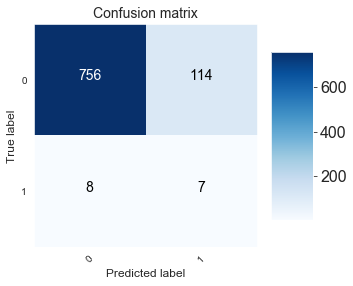

In [178]:
cnf_matrix = confusion_matrix(y_test_scaled, test_preds)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Search to find the best K for KNN model:

In [179]:
def find_best_k(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train_scaled)
        preds = knn.predict(X_test_scaled)
        f1 = recall_score(y_test_scaled, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1

    print('Best K: {}'.format(best_k))
    print('Best Score: {}'.format(best_score))

In [180]:
find_best_k(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)


Best K: 17
Best Score: 0.6666666666666666


In [181]:
knn_model = KNeighborsClassifier(n_neighbors=17)
knn_model.fit(X_train_scaled, y_train_scaled)
test_preds = knn_model.predict(X_test_scaled)

In [182]:
print('Accuracy Score:  ' + str(accuracy_score(y_test_scaled, test_preds)))
print('F1 Score:        ' + str(f1_score(y_test_scaled, test_preds)))
print('Precision Score: ' + str(precision_score(y_test_scaled, test_preds)))
print('Recall Score:    ' + str(recall_score(y_test_scaled, test_preds)))
report = classification_report(y_test_scaled, test_preds)
print ('')
print (report)

Accuracy Score:  0.7706214689265537
F1 Score:        0.08968609865470852
Precision Score: 0.04807692307692308
Recall Score:    0.6666666666666666

              precision    recall  f1-score   support

         0.0       0.99      0.77      0.87       870
         1.0       0.05      0.67      0.09        15

   micro avg       0.77      0.77      0.77       885
   macro avg       0.52      0.72      0.48       885
weighted avg       0.98      0.77      0.86       885



Confusion matrix, without normalization
[[672 198]
 [  5  10]]


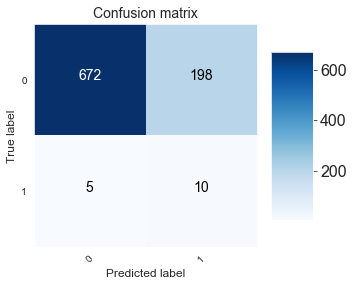

In [183]:
cnf_matrix = confusion_matrix(y_test_scaled, test_preds)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [184]:
train_knn_predictions = knn_model.predict(X_train_scaled)
train_knn_probs = knn_model.predict_proba(X_train_scaled)[:,1]

knn_predictions = knn_model.predict(X_test_scaled)
knn_probs = knn_model.predict_proba(X_test_scaled)[:,1]

Recall Baseline: 0.0 Test: 0.67 Train: 1.0
Precision Baseline: 0.0 Test: 0.05 Train: 0.83
Roc Baseline: 0.5 Test: 0.7 Train: 1.0


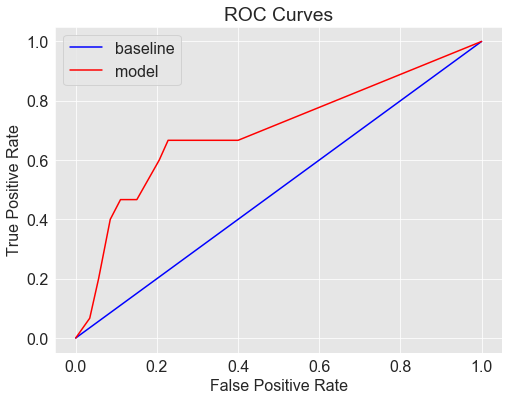

In [185]:
evaluate_model(knn_predictions, knn_probs, train_knn_predictions, train_knn_probs)